In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmeans
import csv

In [15]:
def readFileThroughCSV(filename):
    csvfile = open(filename)
    readerobject = csv.reader(csvfile, delimiter=',')
    List = list(readerobject)
    csvfile.close()
    dataX = [x[1] for x in List[1:]]
    dataY = [x[2] for x in List[1:]]
    arrayX = np.array(dataX)
    arrayX = arrayX.astype(float)
    arrayY = np.array(dataY)
    arrayY = arrayY.astype(float)
    array = np.array([arrayX,arrayY])
    array = np.transpose(array)
    return(array)

In [16]:
array = readFileThroughCSV("ai_project.csv")

In [17]:
kmeans_model = kmeans(n_clusters=3)
kmeans_model.fit(array)
label = kmeans_model.labels_
centroid = kmeans_model.cluster_centers_
inertia = kmeans_model.inertia_

In [18]:
dictionary = {
    "X": array[:,0],
    "Y": array[:,1],
    "Labels": label
}
df = pd.DataFrame(data=dictionary)
df.to_csv('clusterResult.csv')

In [19]:
count0 = 0
count1 = 0
count2 = 0

In [20]:
for x in dictionary["Labels"]:
    if x == 0:
        count0 = count0 + 1
    elif x == 1:
        count1 = count1 + 1
    elif x == 2:
        count2 = count2 + 1

In [21]:
print(count0)

305


In [22]:
print(count1)

99


In [23]:
print(count2)

209


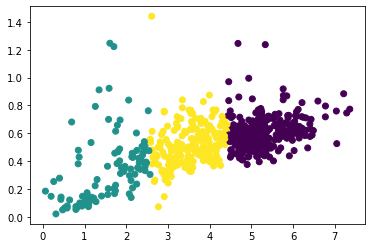

In [24]:
plt.scatter(dictionary["X"], dictionary["Y"], c = dictionary["Labels"])
plt.show()